Importing Required Modules


In [1]:
import numpy as np
import pandas as pd
import plotly.express as xp
from sklearn.cluster import KMeans


Loading Mall_Customer Dataset

In [3]:
customer_df = pd.read_csv('Mall_Customers.csv')

Displaying dataframe

In [3]:
customer_df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
110,111,Male,65,63,52
163,164,Female,31,81,93
134,135,Male,20,73,5
130,131,Male,47,71,9
56,57,Female,51,44,50


Extarcting Required Features from DataFrame

In [4]:
customer_df.drop(columns=['CustomerID','Gender'],inplace=True)

Displaying New Dataframe

In [5]:
customer_df.sample(5)

,Age,Annual Income (k$),Spending Score (1-100)
30,60,30,4
167,33,86,95
165,36,85,75
3,23,16,77
128,59,71,11


visualising Our Data

In [6]:
fig= xp.scatter_3d(customer_df,x='Age',y='Annual Income (k$)',z='Spending Score (1-100)',color='Spending Score (1-100)')
fig.show()


Finding Optimal Number of Clusters using Elbow point meathod

In [7]:
wcss = [] #wcss ---> within cluster squared sum
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit_transform(customer_df)
  wcss.append(kmeans.inertia_)

In [8]:
wcss # these are the squared sum of different cluster points within a cluster

[308812.78,
 221087.19627192977,
 158744.9710801394,
 104366.15145556198,
 97211.84353980479,
 68275.94428646986,
 51448.36126259324,
 44640.02804853041,
 42081.855308685306,
 38378.73890793208]

Plotting a Elbow curve to find out optimum Number of Clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


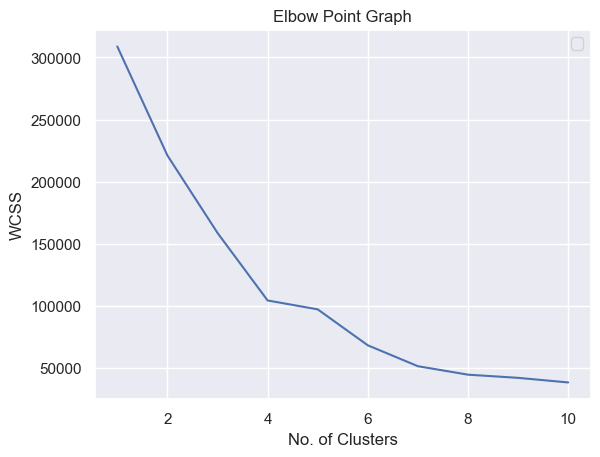

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In [13]:
# We Can Select optimum number of Clusters as 6 since, after that no significant descend are observed

Traning Algoritham with 5 number of clusters

In [14]:
X = customer_df.values
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [15]:
X #My Dataset

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [16]:
y_kmeans # Cluster Number on each Datapoint

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

Plotting The Resultant Dataset Based on Cluster Division

In [17]:
df = pd.DataFrame()
df['Age']  = X[:,0]
df['Income (k$)'] = X[:,1]
df['Spending Score (1-100)'] = X[:,2]
df['Cluster No.'] = y_kmeans

In [18]:
fig = xp.scatter_3d(df,x='Age',y='Income (k$)',z='Spending Score (1-100)',color='Cluster No.')
fig.show()